In [15]:
pip install networkx


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


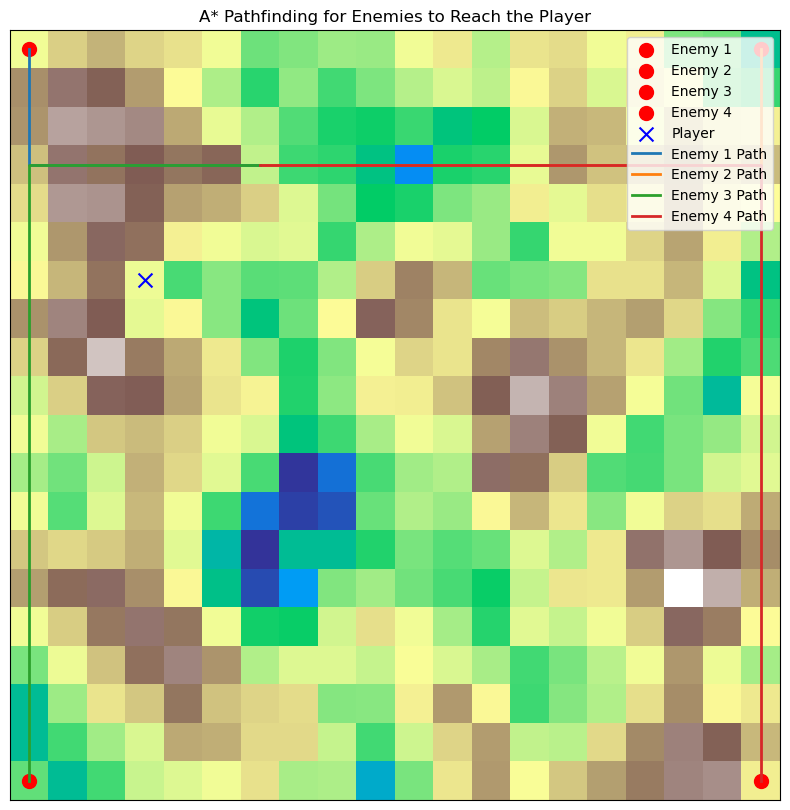

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import noise
import networkx as nx

def generate_perlin_noise_map(shape, scale, octaves, persistence, lacunarity, seed):
    world = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            world[i][j] = noise.pnoise2((i/scale),
                                         (j/scale),
                                         octaves=octaves,
                                         persistence=persistence,
                                         lacunarity=lacunarity,
                                         repeatx=1024,
                                         repeaty=1024,
                                         base=seed)
    return world

def manhattan_distance(node1, node2):
    return abs(node1[0] - node2[0]) + abs(node1[1] - node2[1])

def find_optimal_path(start, goal, terrain):
    G = nx.grid_2d_graph(terrain.shape[0], terrain.shape[1])
    weights = {(i, j): terrain[i, j] for i, j in G.nodes()}
    path = nx.astar_path(G, start, goal, heuristic=manhattan_distance, weight='weight')
    return path

# Set parameters for Perlin noise
grid_size = (20, 20)
scale = 5
octaves = 6
persistence = 0.5
lacunarity = 2.0
seed = np.random.randint(0, 100)

# Generate Perlin noise-based terrain
terrain = generate_perlin_noise_map(grid_size, scale, octaves, persistence, lacunarity, seed)

# Set start spots as enemy 1, 2, 3, and 4
start_points_enemies = [(0, 0), (0, grid_size[1] - 1), (grid_size[0] - 1, 0), (grid_size[0] - 1, grid_size[1] - 1)]

# Set the goal point for the player (randomly placed)
goal_point_player = (np.random.randint(grid_size[0]), np.random.randint(grid_size[1]))

# Find optimal paths for all enemies to reach the player
optimal_paths_enemies = []

for start_point_enemy in start_points_enemies:
    enemy_path = find_optimal_path(start_point_enemy, goal_point_player, terrain)
    optimal_paths_enemies.append(enemy_path)

# Visualize the map with paths
plt.figure(figsize=(10, 10))

# Display the terrain with the custom colormap
plt.imshow(terrain, origin='upper', interpolation='none', cmap='terrain')

# Mark the start points for enemies
for i, start_point_enemy in enumerate(start_points_enemies, start=1):
    plt.scatter(*start_point_enemy, color='red', marker='o', s=100, label=f'Enemy {i}')

# Mark the goal point for the player
plt.scatter(*goal_point_player, color='blue', marker='x', s=100, label='Player')

# Plot the optimal paths for enemies to reach the player
for i, optimal_path_enemy in enumerate(optimal_paths_enemies, start=1):
    x_coords, y_coords = zip(*optimal_path_enemy)
    plt.plot(y_coords, x_coords, linewidth=2, label=f'Enemy {i} Path')

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

plt.legend(loc='upper right')
plt.title('A* Pathfinding for Enemies to Reach the Player')
plt.show()
